In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set()

In [2]:
DATA_FOLDER = 'LAM data'
FIG_FOLDER = 'fig'

os.makedirs(FIG_FOLDER, exist_ok=True)

In [3]:
# data_file_north = os.path.join(DATA_FOLDER, 'lamraw_4_18_276.xlsx')
data_file_south = os.path.join(DATA_FOLDER, 'lamraw_107_18_276.xlsx')
# data_file_east = os.path.join(DATA_FOLDER, 'lamraw_159_18_276.xlsx')
# data_file_west = os.path.join(DATA_FOLDER, 'lamraw_128_18_276.xlsx')

# df_n = pd.read_excel(data_file_north)
df_s = pd.read_excel(data_file_south)
# df_e = pd.read_excel(data_file_east)
# df_w = pd.read_excel(data_file_west)

df_s

,Measurement point,year,day,hour,minute,second,hunderths of a second,vehicle lenght (m),lane,direction,vehicle class,speed,"If faulty, 1",Time (technical),time period (technical),start (technical)
0,107,18,276,0,0,11,15,1940-03-01 00:00:00,1,Hämeenlinna,1,83,0,1115,-2,0
1,107,18,276,0,0,20,55,1960-03-01 00:00:00,4,Helsinki,1,76,0,2055,-2,0
2,107,18,276,0,1,36,4,1940-03-01 00:00:00,1,Hämeenlinna,1,81,0,9604,8474,0
3,107,18,276,0,2,8,14,1940-04-01 00:00:00,1,Hämeenlinna,1,93,0,12814,3194,0
4,107,18,276,0,2,18,33,6.00,3,Helsinki,1,79,0,13833,-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60270,107,18,276,23,58,58,0,1980-03-01 00:00:00,4,Helsinki,1,85,0,8633800,4283,0
60271,107,18,276,23,59,5,83,16.00,4,Helsinki,4,58,0,8634583,766,0
60272,107,18,276,23,59,12,48,1980-03-01 00:00:00,4,Helsinki,1,84,0,8635248,565,0
60273,107,18,276,23,59,31,63,4.00,1,Hämeenlinna,1,86,0,8637163,9076,0


Between 6:00 - 9:00

In [5]:
# def f(x): 
#     return datetime.time(x['hour'], x['minute'], x['second'])
# df_n['time_event'] = df_n.apply(f, axis=1)
# timing_6to9 = (datetime.time(hour=6) <= df_n.time_event) & (df_n.time_event < datetime.time(hour=9))
# timing_6to9

In [4]:
timing_6to9 = (6 <= df_s.hour) & (df_s.hour < 9)
timing_6to9

0        False
1        False
2        False
3        False
4        False
         ...  
60270    False
60271    False
60272    False
60273    False
60274    False
Name: hour, Length: 60275, dtype: bool

In [5]:
dirHelsinki = df_s['direction'] == 'Helsinki'
dirHelsinki

0        False
1         True
2        False
3        False
4         True
         ...  
60270     True
60271     True
60272     True
60273    False
60274     True
Name: direction, Length: 60275, dtype: bool

In [6]:
df_timing_6to9_dirHelsinki = df_s[timing_6to9 & dirHelsinki]
df_timing_6to9_dirHelsinki

,Measurement point,year,day,hour,minute,second,hunderths of a second,vehicle lenght (m),lane,direction,vehicle class,speed,"If faulty, 1",Time (technical),time period (technical),start (technical)
2065,107,18,276,6,0,1,27,1980-03-01 00:00:00,3,Helsinki,1,95,0,2160127,2323,0
2066,107,18,276,6,0,1,72,1980-03-01 00:00:00,4,Helsinki,1,85,0,2160172,388,0
2067,107,18,276,6,0,3,5,1960-03-01 00:00:00,4,Helsinki,1,89,0,2160305,116,0
2068,107,18,276,6,0,4,82,1980-03-01 00:00:00,4,Helsinki,1,89,0,2160482,162,0
2071,107,18,276,6,0,12,24,1980-03-01 00:00:00,3,Helsinki,1,101,0,2161224,1082,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15011,107,18,276,8,59,54,91,1980-07-01 00:00:00,4,Helsinki,2,31,0,3239491,699,0
15012,107,18,276,8,59,56,42,1980-03-01 00:00:00,3,Helsinki,1,41,0,3239642,105,0
15014,107,18,276,8,59,58,52,3.00,3,Helsinki,1,40,0,3239852,176,3239101
15016,107,18,276,8,59,59,1,2020-10-01 00:00:00,4,Helsinki,3,38,0,3239901,319,0


In [7]:
speed = df_timing_6to9_dirHelsinki['speed']

In [8]:
np.mean(speed) # average speed 

51.64730032346355

In [9]:
np.std(speed)

22.630938557583974

<AxesSubplot:xlabel='speed', ylabel='Density'>

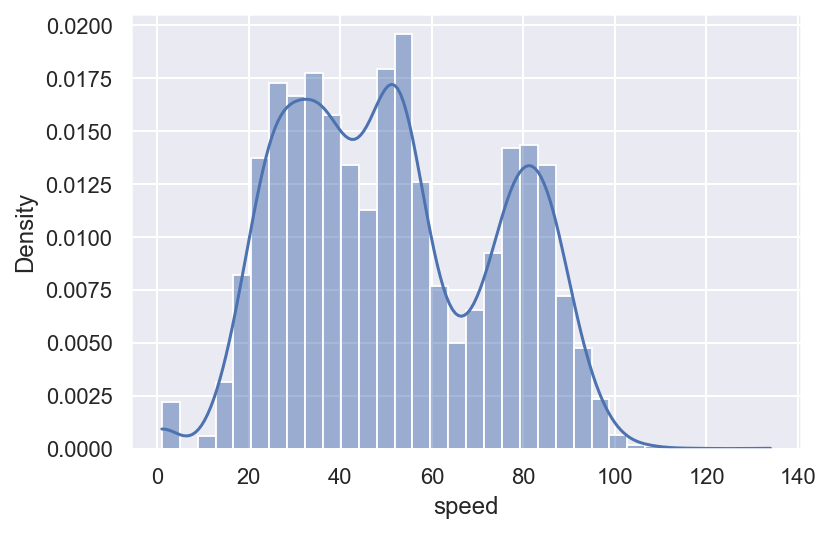

In [10]:
sns.histplot(speed, stat="density", kde=True)

In [11]:
df = df_s[timing_6to9 & dirHelsinki] 

In [12]:
def f(x): 
    return (x['hour'] - 6)*60 + x['minute']
df['min_since_6'] = df.apply(f, axis=1)

<ipython-input-12-b09f08bc06bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['min_since_6'] = df.apply(f, axis=1)


In [13]:
df

,Measurement point,year,day,hour,minute,second,hunderths of a second,vehicle lenght (m),lane,direction,vehicle class,speed,"If faulty, 1",Time (technical),time period (technical),start (technical),min_since_6
2065,107,18,276,6,0,1,27,1980-03-01 00:00:00,3,Helsinki,1,95,0,2160127,2323,0,0
2066,107,18,276,6,0,1,72,1980-03-01 00:00:00,4,Helsinki,1,85,0,2160172,388,0,0
2067,107,18,276,6,0,3,5,1960-03-01 00:00:00,4,Helsinki,1,89,0,2160305,116,0,0
2068,107,18,276,6,0,4,82,1980-03-01 00:00:00,4,Helsinki,1,89,0,2160482,162,0,0
2071,107,18,276,6,0,12,24,1980-03-01 00:00:00,3,Helsinki,1,101,0,2161224,1082,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15011,107,18,276,8,59,54,91,1980-07-01 00:00:00,4,Helsinki,2,31,0,3239491,699,0,179
15012,107,18,276,8,59,56,42,1980-03-01 00:00:00,3,Helsinki,1,41,0,3239642,105,0,179
15014,107,18,276,8,59,58,52,3.00,3,Helsinki,1,40,0,3239852,176,3239101,179
15016,107,18,276,8,59,59,1,2020-10-01 00:00:00,4,Helsinki,3,38,0,3239901,319,0,179


In [14]:
time_limits = np.arange(0, 181, 5)
time_limits

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180])

In [15]:
time_group = np.zeros(len(df))
for i in range(len(time_limits)-1):
    a, b = time_limits[i], time_limits[i+1]
    belong_to_i = (a <= df.min_since_6) & (df.min_since_6 < b)
    idx_belong_to_i = df[belong_to_i].index
    df.loc[idx_belong_to_i, 'group'] = i

/Users/kazuichirotaira/.pyenv/versions/3.9.1/lib/python3.9/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/kazuichirotaira/.pyenv/versions/3.9.1/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/kazuichirotaira/.pyenv/versions/3.9.1/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A 

In [16]:
df

,Measurement point,year,day,hour,minute,second,hunderths of a second,vehicle lenght (m),lane,direction,vehicle class,speed,"If faulty, 1",Time (technical),time period (technical),start (technical),min_since_6,group
2065,107,18,276,6,0,1,27,1980-03-01 00:00:00,3,Helsinki,1,95,0,2160127,2323,0,0,0.0
2066,107,18,276,6,0,1,72,1980-03-01 00:00:00,4,Helsinki,1,85,0,2160172,388,0,0,0.0
2067,107,18,276,6,0,3,5,1960-03-01 00:00:00,4,Helsinki,1,89,0,2160305,116,0,0,0.0
2068,107,18,276,6,0,4,82,1980-03-01 00:00:00,4,Helsinki,1,89,0,2160482,162,0,0,0.0
2071,107,18,276,6,0,12,24,1980-03-01 00:00:00,3,Helsinki,1,101,0,2161224,1082,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15011,107,18,276,8,59,54,91,1980-07-01 00:00:00,4,Helsinki,2,31,0,3239491,699,0,179,35.0
15012,107,18,276,8,59,56,42,1980-03-01 00:00:00,3,Helsinki,1,41,0,3239642,105,0,179,35.0
15014,107,18,276,8,59,58,52,3.00,3,Helsinki,1,40,0,3239852,176,3239101,179,35.0
15016,107,18,276,8,59,59,1,2020-10-01 00:00:00,4,Helsinki,3,38,0,3239901,319,0,179,35.0


In [17]:
speeds = df.groupby('group')['speed'].mean()
speeds

group
0.0     82.845070
1.0     83.274725
2.0     82.529101
3.0     81.117925
4.0     78.050725
5.0     75.672297
6.0     64.010601
7.0     53.354633
8.0     59.085271
9.0     82.060976
10.0    81.441860
11.0    84.313433
12.0    86.524823
13.0    86.346154
14.0    72.872340
15.0    55.168317
16.0    56.273616
17.0    51.581882
18.0    50.010638
19.0    35.612403
20.0    34.579592
21.0    23.989848
22.0    24.280000
23.0    39.164502
24.0    31.912442
25.0    20.776536
26.0    29.330189
27.0    25.871921
28.0    31.418605
29.0    27.460465
30.0    24.425121
31.0    31.049550
32.0    28.075377
33.0    32.305936
34.0    48.992424
35.0    43.604082
Name: speed, dtype: float64

## Average speed (Aggregated 5 minutes - 6 ~ 9 am)

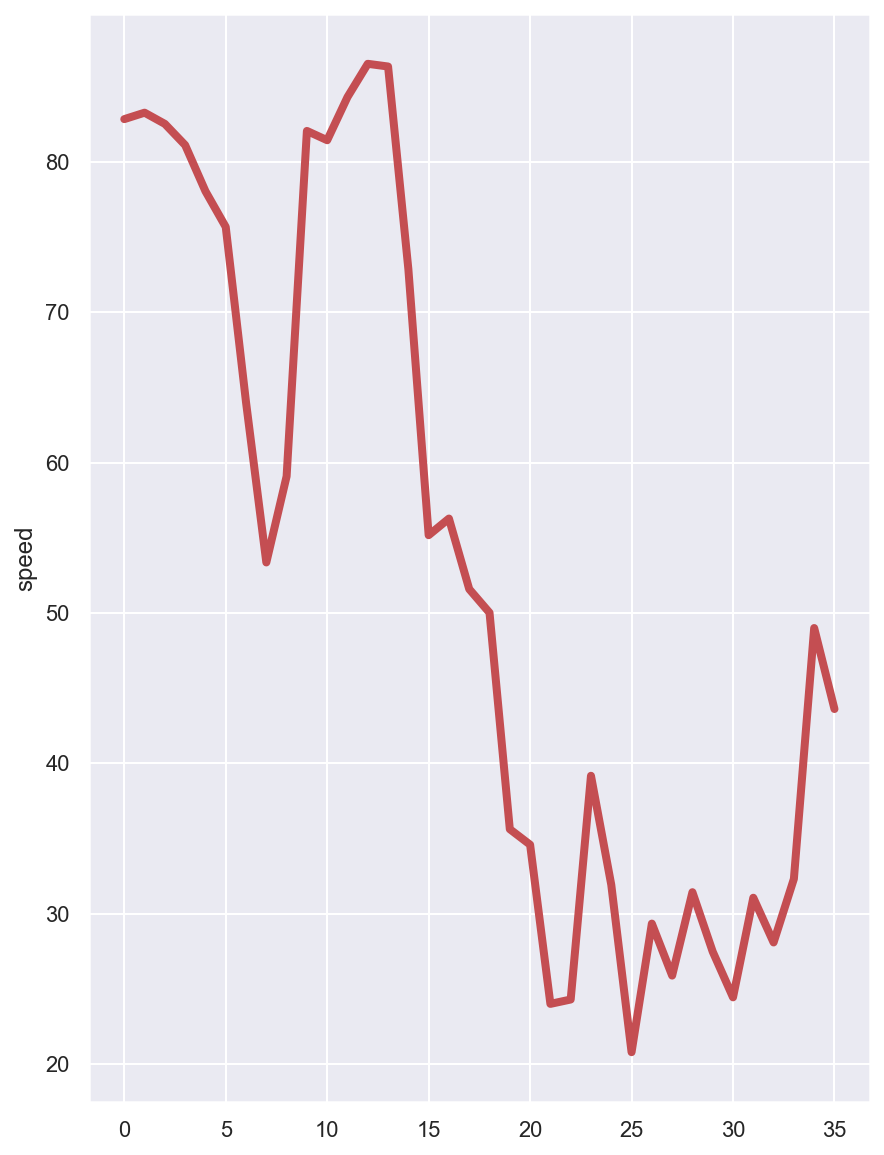

In [18]:
fig, ax = plt.subplots(figsize=(7, 10))
sns.lineplot(x=np.arange(len(speeds)), y=speeds, lw=4, color='C3');
# ax.set_xticks('');

In [19]:
n = df['group'].value_counts().sort_index()
n

0.0     142
1.0     182
2.0     189
3.0     212
4.0     276
5.0     296
6.0     283
7.0     313
8.0     258
9.0     164
10.0    129
11.0    134
12.0    141
13.0    130
14.0    282
15.0    303
16.0    307
17.0    287
18.0    282
19.0    258
20.0    245
21.0    197
22.0    200
23.0    231
24.0    217
25.0    179
26.0    212
27.0    203
28.0    215
29.0    215
30.0    207
31.0    222
32.0    199
33.0    219
34.0    264
35.0    245
Name: group, dtype: int64

## Aggregated Traffic volume (5 minutes - 6 ~ 9 am)

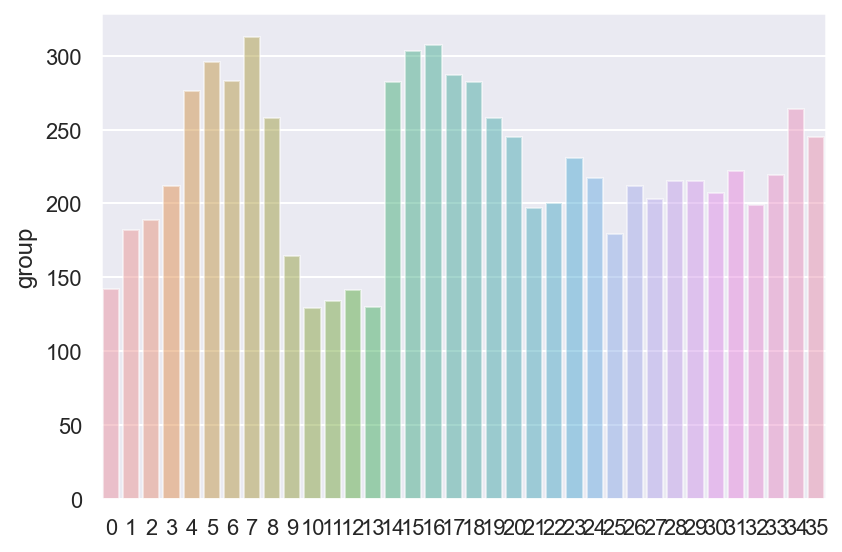

In [20]:
sns.barplot(x=np.arange(len(n)), y=n, alpha=0.5)
plt.tight_layout();

## Average speed and traffic volume

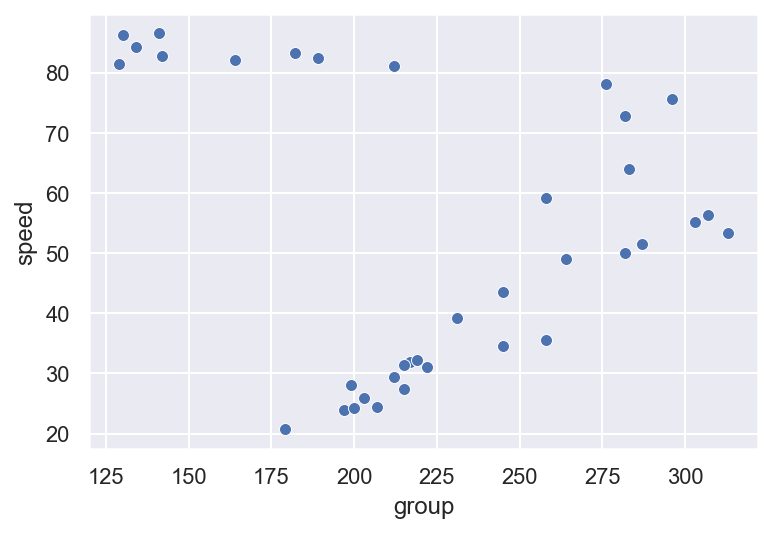

In [21]:
sns.scatterplot(x=n, y=speeds);

In [22]:
Density = n / speeds
Density

0.0     1.714043
1.0     2.185537
2.0     2.290101
3.0     2.613479
4.0     3.536162
5.0     3.911603
6.0     4.421143
7.0     5.866407
8.0     4.366570
9.0     1.998514
10.0    1.583952
11.0    1.589308
12.0    1.629590
13.0    1.505568
14.0    3.869781
15.0    5.492283
16.0    5.455487
17.0    5.563969
18.0    5.638800
19.0    7.244667
20.0    7.085104
21.0    8.211807
22.0    8.237232
23.0    5.898198
24.0    6.799856
25.0    8.615488
26.0    7.228048
27.0    7.846344
28.0    6.843079
29.0    7.829438
30.0    8.474881
31.0    7.149862
32.0    7.088062
33.0    6.778940
34.0    5.388588
35.0    5.618740
dtype: float64

## Average speed and traffic volume

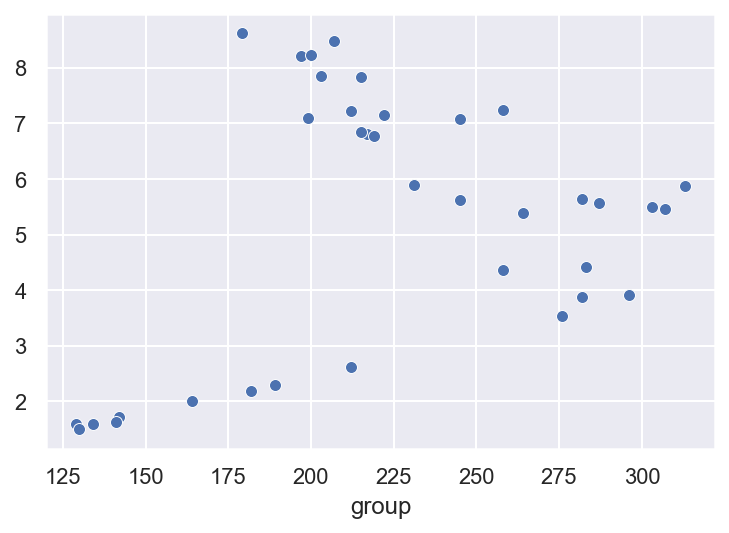

In [23]:
sns.scatterplot(x=n, y=Density);

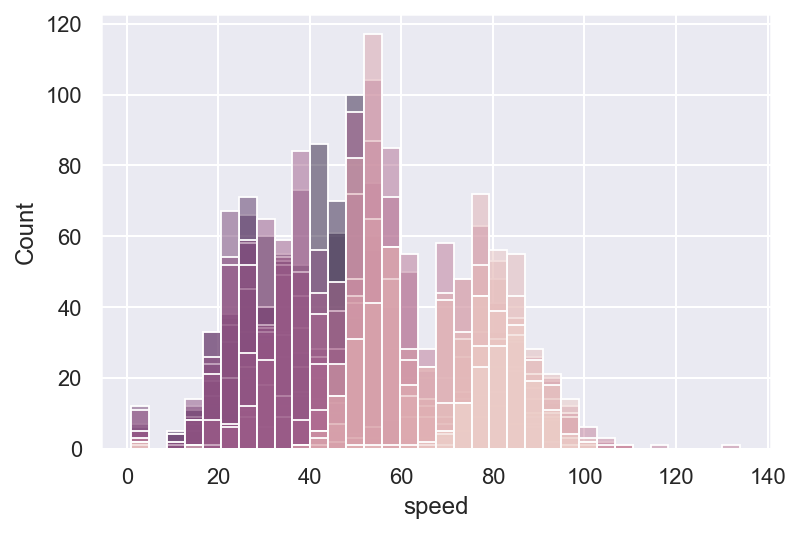

In [24]:
sns.histplot(x='speed', data=df, hue='group', legend=False);